# Kaggle - Bike Sharing Demands - EDA
**Author: Chris Shin**

## Business Understanding
The Bike Sharing Demand Kaggle project involves predicting the hourly bike rental demand based on various environmental and seasonal factors. This problem is of significant interest to bike sharing companies as it can help them optimize their bike inventory, staff allocation, and pricing strategies. Accurate predictions of bike rental demand can enable bike sharing companies to meet the demands of their customers while minimizing costs and maximizing profits. Additionally, accurate predictions can help local governments and urban planners better understand the bike usage patterns in different areas and make informed decisions about bike infrastructure investments.

## Evaluation Metric

The evaluation metric for this project is Root Mean Squared Logarithmic Error (RMSLE). It is defined as:

RMSLE = sqrt(1/n * sum((log(p+1) - log(a+1))^2))

where p is the predicted count, a is the actual count, log() is the natural logarithm, and n is the total number of records in the test set. The use of log in the formula penalizes underestimation more than overestimation, which is appropriate for this bike sharing demand prediction task. The lower the RMSLE score, the better the performance of the model.

Root Mean Squared Logarithmic Error (RMSLE) is a regression evaluation metric that is commonly used when the target variable has a wide range of values. It is similar to the Root Mean Squared Error (RMSE), but instead of taking the square of the differences between the predicted and actual values, it takes the square of the differences between the logarithms of the predicted and actual values. The RMSLE can be useful in situations where the errors are expected to be proportional to the size of the target variable.

Other commonly used regression evaluation metrics include:

- Mean Squared Error (MSE): the average of the squared differences between the predicted and actual values.
- Mean Absolute Error (MAE): the average of the absolute differences between the predicted and actual values.
- R-squared (R2): a measure of how well the model fits the data, with a value between 0 and 1 indicating the proportion of the variance in the target variable that is explained by the model.
- Mean Absolute Percentage Error (MAPE): the average of the absolute percentage differences between the predicted and actual values.
- Explained Variance Score (EV): a measure of how much of the variance in the target variable is explained by the model.
Each of these metrics has its own strengths and weaknesses, and the choice of which to use depends on the specific problem and the preferences of the analyst or stakeholder.

Here are the pros and cons of several commonly used regression evaluation metrics and when you should use them:

1. Mean Squared Error (MSE):
    - Pros: Gives equal weight to all errors; widely used; differentiable and convex.
    - Cons: Large errors can have a disproportionate impact on the metric; units are squared.
    - When to use: Useful when large errors need to be penalized more.
2. Root Mean Squared Error (RMSE):
    - Pros: Units are the same as the target variable; differentiable and convex.
    - Cons: Same as MSE, plus it is sensitive to outliers.
    - When to use: Useful when large errors need to be penalized more, and the unit of the target variable is important.
3. Mean Absolute Error (MAE):
    - Pros: Robust to outliers; the metric is in the same unit as the target variable.
    - Cons: Ignores the direction of the errors; not differentiable at zero.
    - When to use: Useful when outliers are present, and the direction of the errors is not important.
4. Root Mean Squared Logarithmic Error (RMSLE):
    - Pros: Handles both small and large errors equally; penalizes underestimation more than overestimation.
    - Cons: Assumes that predictions and target variables are positive; not as widely used as other metrics.
    - When to use: Useful when predicting counts or when the target variable has a wide range.
5. R-squared (R2):
    - Pros: Provides a measure of goodness of fit; ranges from 0 to 1, with higher values indicating better fit.
    - Cons: Can be biased by outliers; not useful for comparing models with different target variables.
    - When to use: Useful when comparing models with the same target variable and when the goal is to maximize the goodness of fit.
6. Mean Absolute Percentage Error (MAPE):
    - Pros: Easy to interpret; the metric is in percentage terms.
    - Cons: Divides by zero if any target values are zero; sensitive to outliers.
    - When to use: Useful when the scale of the target variable is important, and the goal is to minimize percentage errors.
7. Explained Variance (EV):
    - Pros: Indicates the percentage of variance in the target variable that is explained by the model; ranges from 0 to 1, with higher values indicating better fit.
    - Cons: Not sensitive to the direction of errors; not useful for comparing models with different target variables.
    - When to use: Useful when comparing models with the same target variable and when the goal is to maximize the percentage of variance explained.

In summary, the choice of evaluation metric depends on the problem and the goals of the analysis. It is often a trade-off between bias and variance, sensitivity to outliers, and the importance of the units and direction of the errors.

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sampleSubmission.csv')

In [7]:
print(f'train shape = {train.shape}')
print(f'test shape = {test.shape}')

train shape = (10886, 12)
test shape = (6493, 9)


In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


- Count is the target
- Test does not contain registered and casual but shown in Train. These can be removed unless there are correlation that we can generate.


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [13]:
train.describe(include=['O'])

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


### Data Description

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

Categorical: season, weather
Binary: holiday, workingday
Numerical: temp, atemp, humidity, winspeed

In [14]:
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]).astype(int)
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1]).astype(int)
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]).astype(int)
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0]).astype(int)

In [15]:
train['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [16]:
train['year'].unique()

array([2011, 2012])

In [17]:
train['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [18]:
train['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [19]:
from datetime import datetime
import calendar

train['weekday'] = train['datetime'].apply(lambda x: x.split()[0]).apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

In [20]:
train['weekday'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

### How to treal categorical variables? Numerical or using onehotencoding?

It is generally better to encode categorical variables using techniques such as one-hot encoding, target encoding, or label encoding, rather than converting them to numerical variables. This is because converting categorical variables to numerical variables can create an arbitrary and meaningless order, which can lead to incorrect modeling assumptions and poor model performance.

One-hot encoding creates a new binary variable for each unique category in the categorical variable, while target encoding replaces each category with the mean target value of that category. Label encoding assigns a unique integer to each category, but it does not provide any notion of similarity or difference between categories.

In general, one-hot encoding is a good choice for categorical variables with a small number of unique categories, while target encoding may be more appropriate for categorical variables with many unique categories. Label encoding may be suitable for ordinal categorical variables, where the order of the categories is meaningful, but it should be used with caution for nominal categorical variables.

If the categorical variable has an inherent order or hierarchy, such as "education level" (e.g. "high school", "college", "graduate degree"), then it may be appropriate to encode it as ordinal numeric values, such as 1 for "high school", 2 for "college", and 3 for "graduate degree". This can help capture the relative importance or weight of different categories within the variable.

However, if there is no inherent order or hierarchy among the categories, then it may be better to use one-hot encoding. This creates a binary variable for each category, indicating whether or not that category is present in the observation. This approach treats each category as equally important and avoids introducing any artificial ordering.

Ultimately, the decision of whether to use ordinal encoding or one-hot encoding should be based on the specific characteristics of the data and the modeling task at hand.

For this reason, it seems like it is good idea to convert season into object, and keep the weather as numeric, which is as it is. Because there is some ordinality in the weather which tells lower to be more sunny and higher to be severe rain.

In [21]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})

# Visualization

First lets look at the distribution of the target -> Count

<Figure size 1500x1500 with 0 Axes>

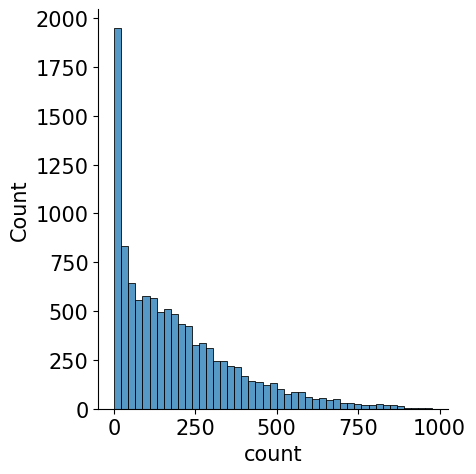

In [22]:
mpl.rc('font', size=15)
plt.figure(figsize=(15,15))
ax = sns.displot(x='count', data=train)

Since it is very right skewed, we should think of making more normalized.

<Figure size 1500x1500 with 0 Axes>

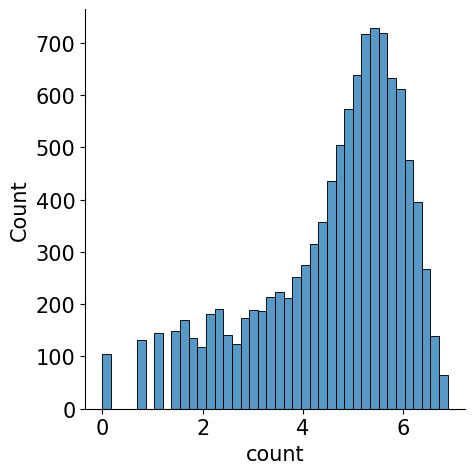

In [23]:
mpl.rc('font',size=15)
plt.figure(figsize=(15,15))
sns.displot(np.log(train['count']))

It seems like it is much more normalized than before. We should think of using log transformation on the target variable, count

In [24]:
import matplotlib.gridspec as gridspec

def plot_bar(df, features, target, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     
    # Create grids for given number of subplots
    grid = gridspec.GridSpec(num_rows, num_cols) 
    # spacing between each subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for idx, feature in enumerate(features):
        # Create subplot for each grid
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y=target, data=df, palette='Set2', ax=ax)

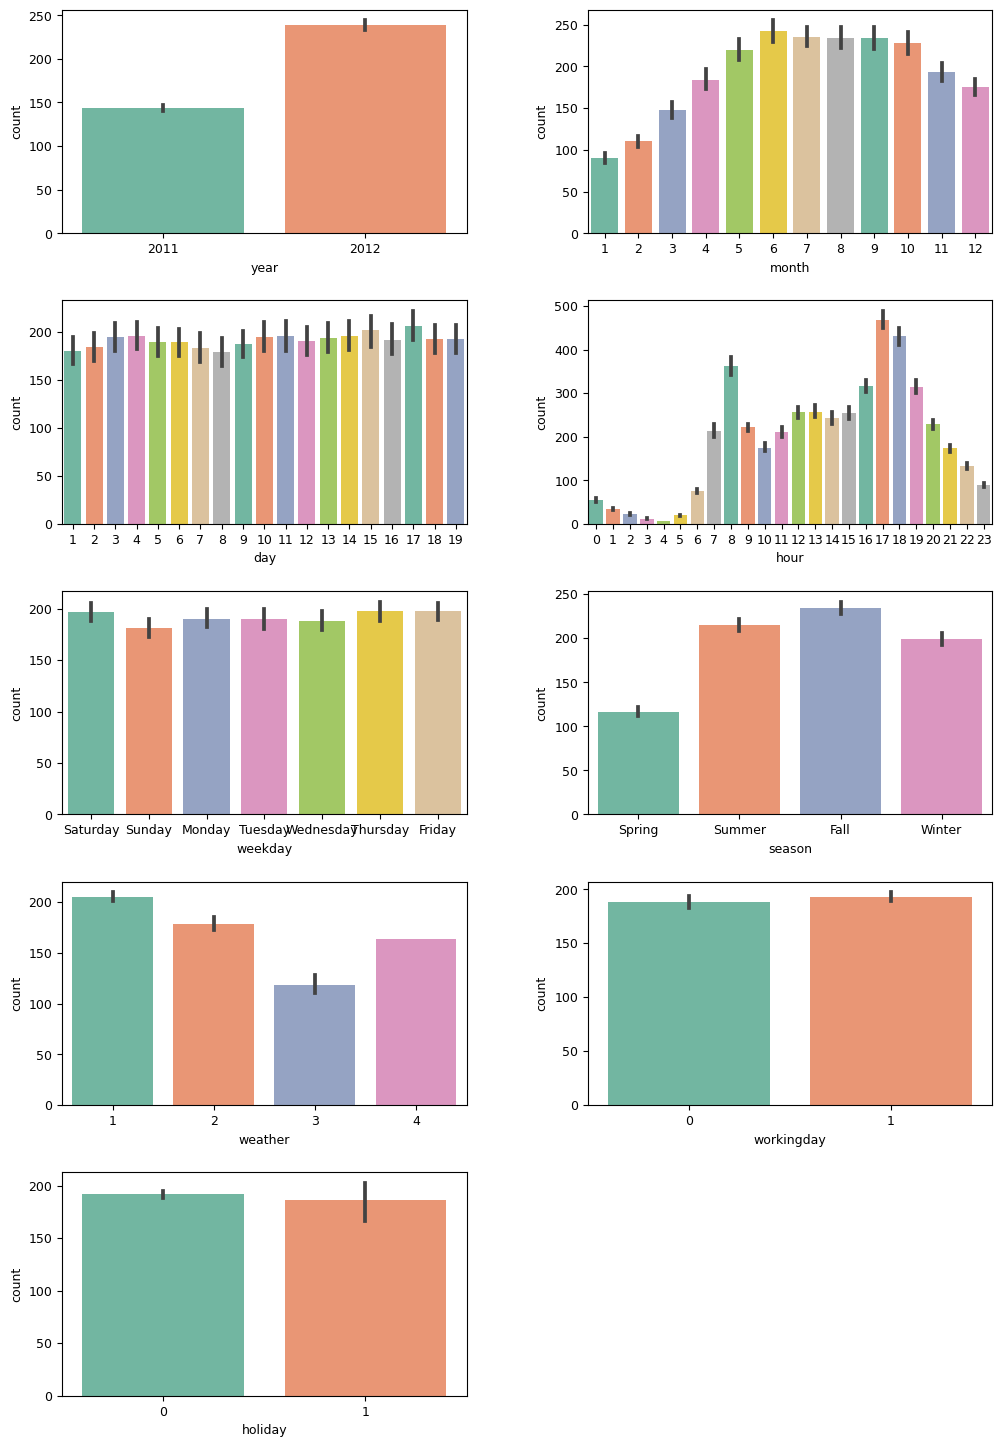

In [26]:
plot_bar(train, ['year','month', 'day', 'hour', 'weekday', 'season', 'weather', 'workingday', 'holiday'], 'count', 5, 2)

In [27]:
import matplotlib.gridspec as gridspec

def plot_box(df, features, target, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     
    # Create grids for given number of subplots
    grid = gridspec.GridSpec(num_rows, num_cols) 
    # spacing between each subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for idx, feature in enumerate(features):
        # Create subplot for each grid
        ax = plt.subplot(grid[idx])
        sns.boxplot(x=feature, y=target, data=df, palette='Set2', ax=ax)

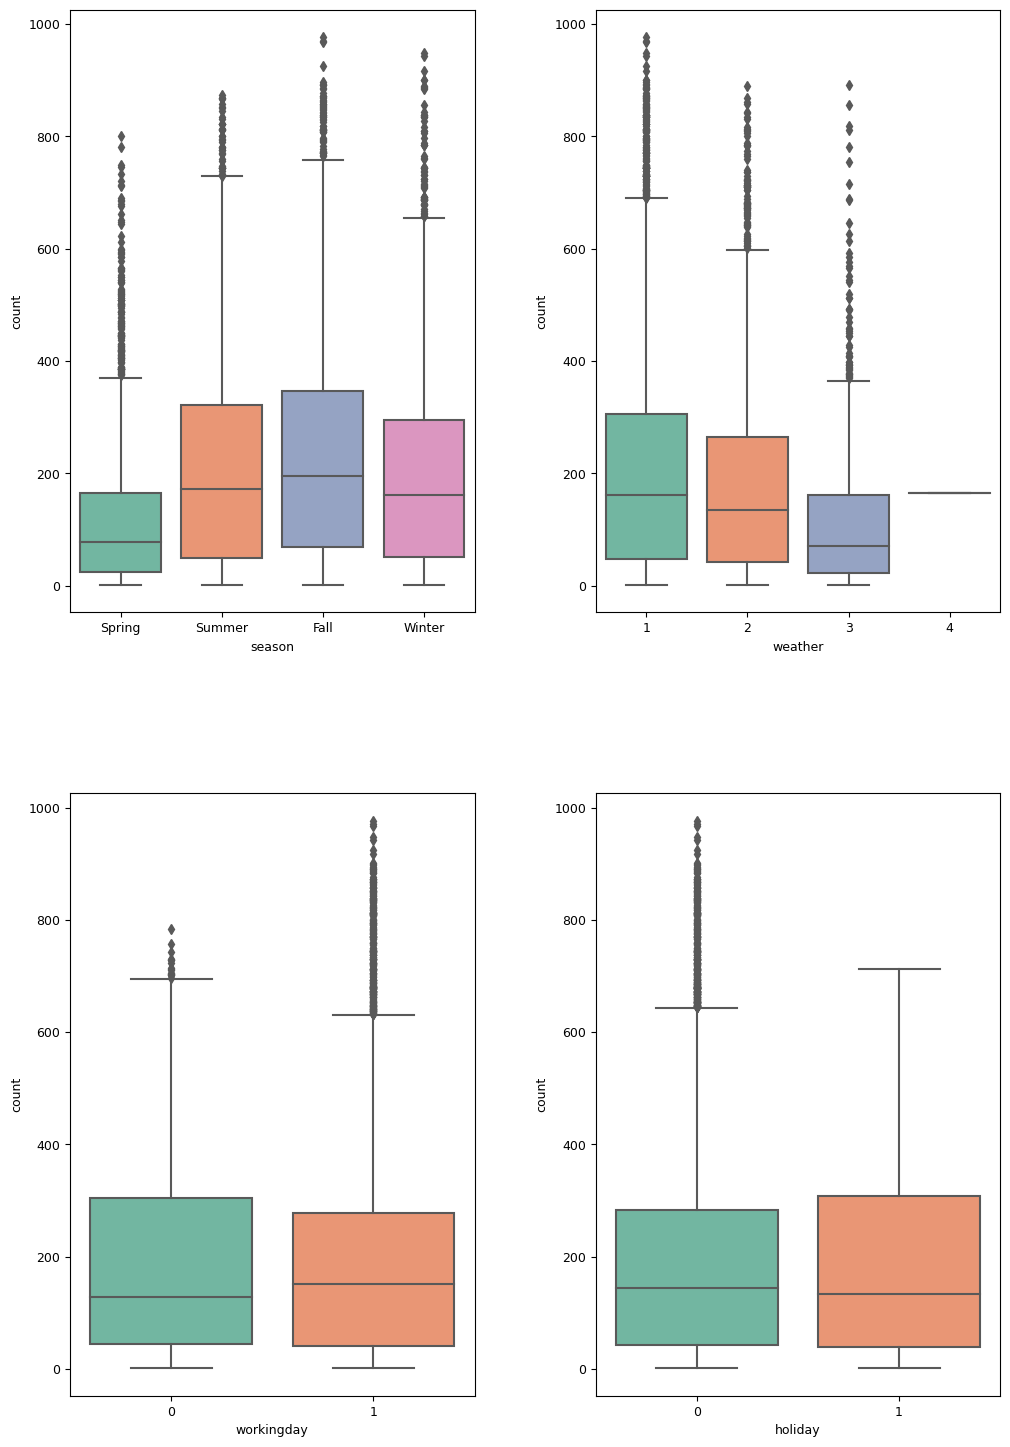

In [29]:
plot_box(train, ['season', 'weather', 'workingday', 'holiday'], 'count', 2, 2)

In [32]:
import matplotlib.gridspec as gridspec

def plot_point(df, feature, target, hues, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     
    # Create grids for given number of subplots
    grid = gridspec.GridSpec(num_rows, num_cols) 
    # spacing between each subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for idx, h in enumerate(hues):
        # Create subplot for each grid
        ax = plt.subplot(grid[idx])
        sns.pointplot(x=feature, y=target, data=df, hue=h, palette='Set2', ax=ax)

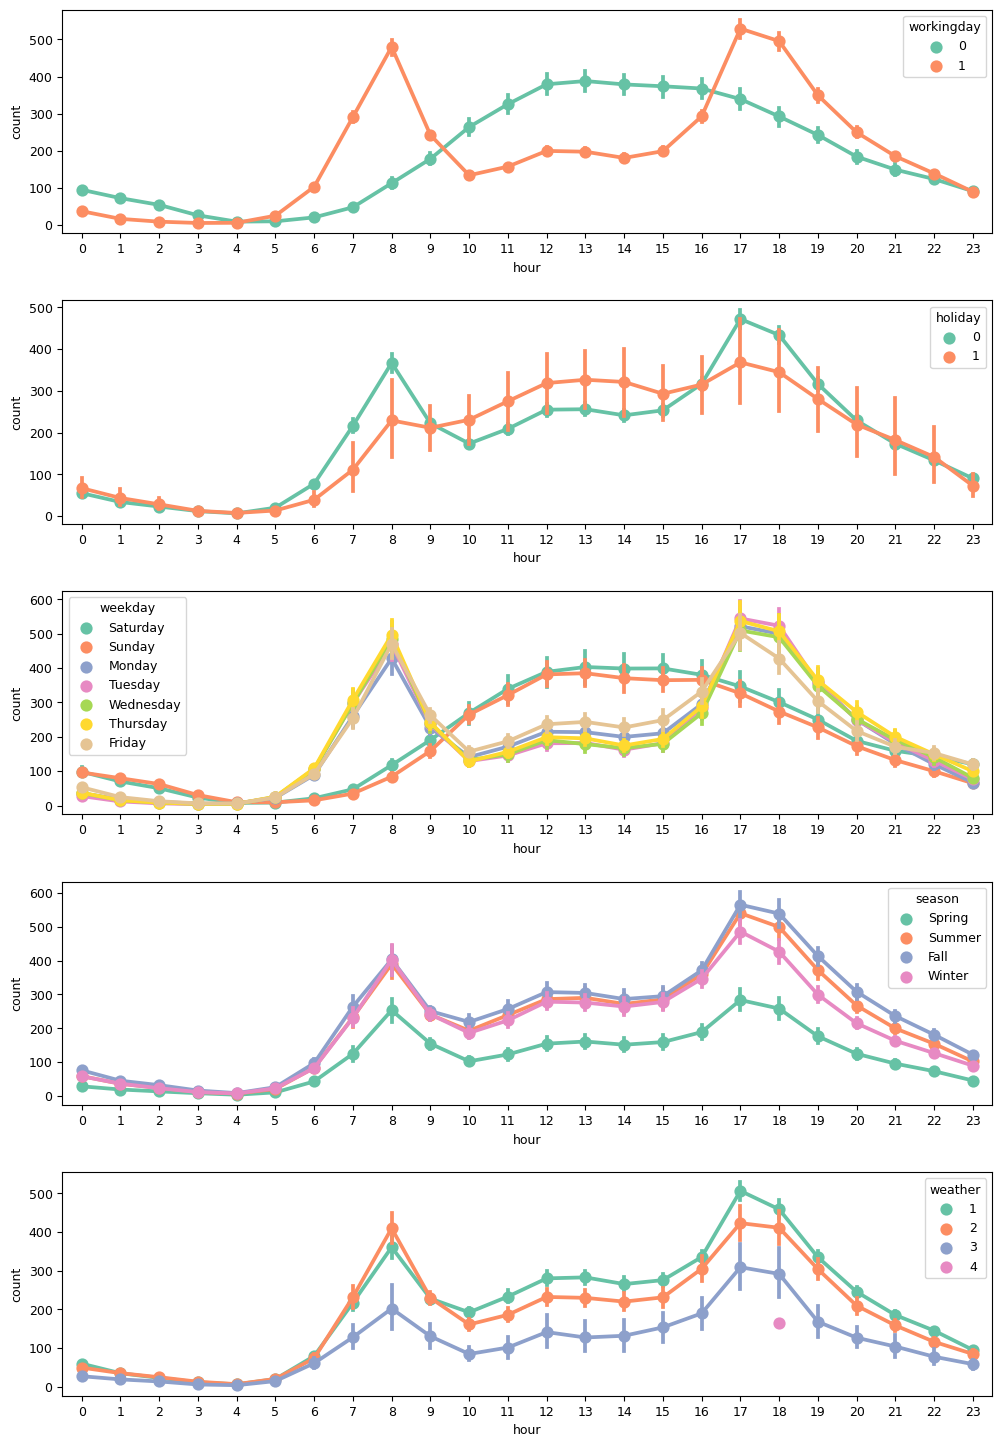

In [33]:
plot_point(train, 'hour', 'count', ['workingday', 'holiday', 'weekday', 'season', 'weather'], 5, 1)

In [41]:
import matplotlib.gridspec as gridspec

def plot_reg(df, features, target, num_rows, num_cols, 
                                  size=(12, 18)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     
    # Create grids for given number of subplots
    grid = gridspec.GridSpec(num_rows, num_cols) 
    # spacing between each subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    for idx, feature in enumerate(features):
        # Create subplot for each grid
        ax = plt.subplot(grid[idx])
        sns.regplot(x=feature, y=target, data=df, ax=ax, scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

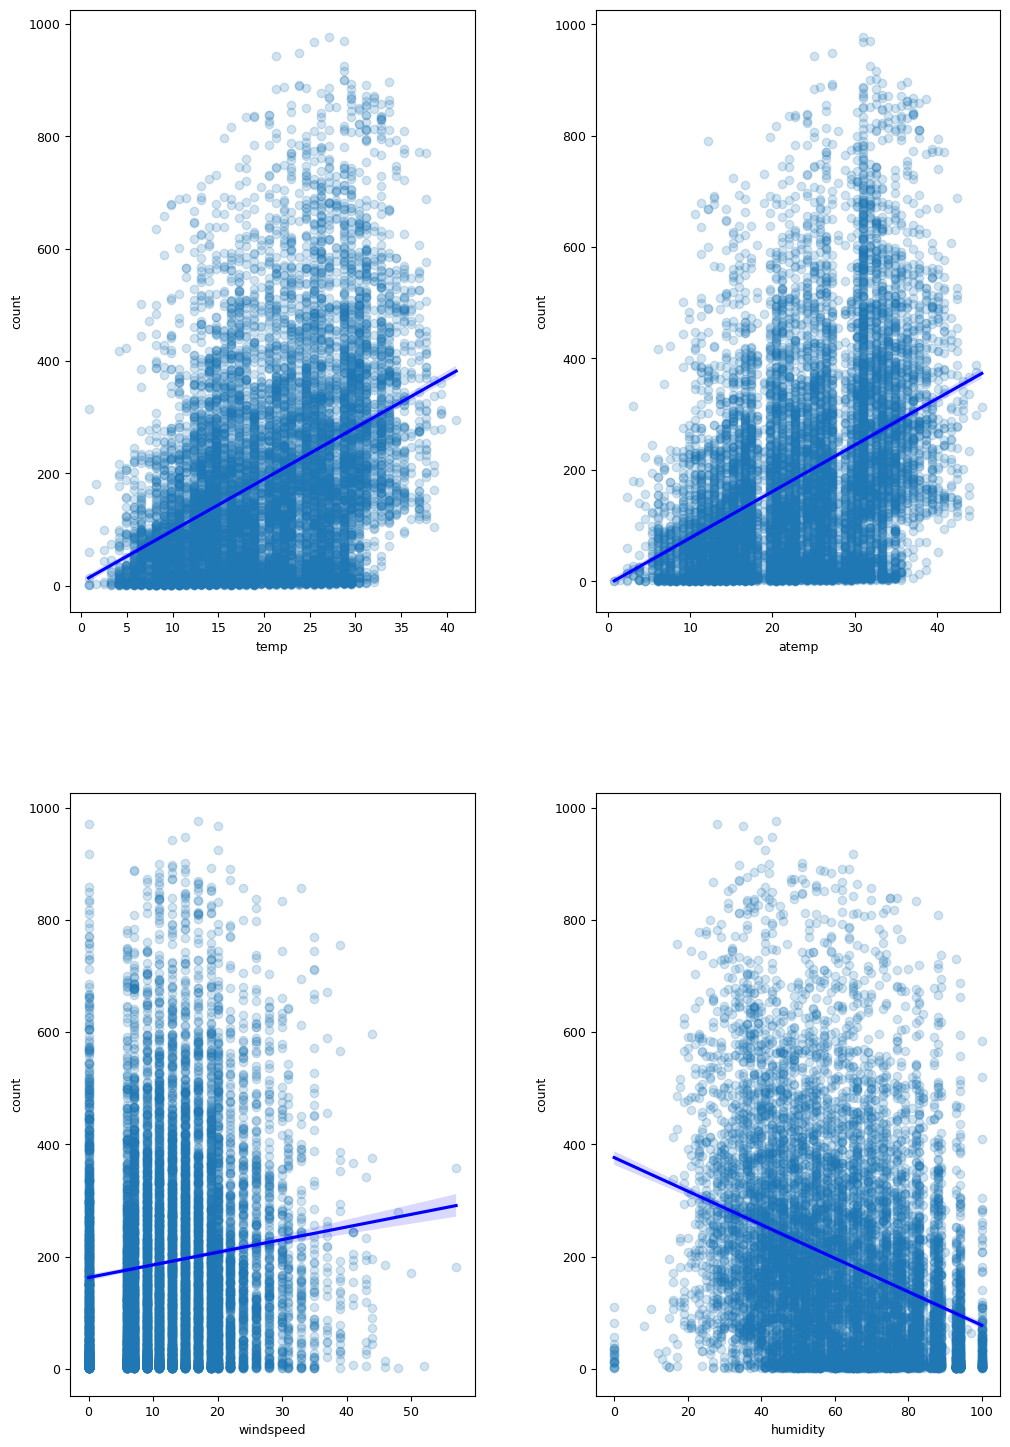

In [42]:
plot_reg(train, ['temp', 'atemp', 'windspeed', 'humidity'], 'count', 2, 2)

In [43]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


<Axes: >

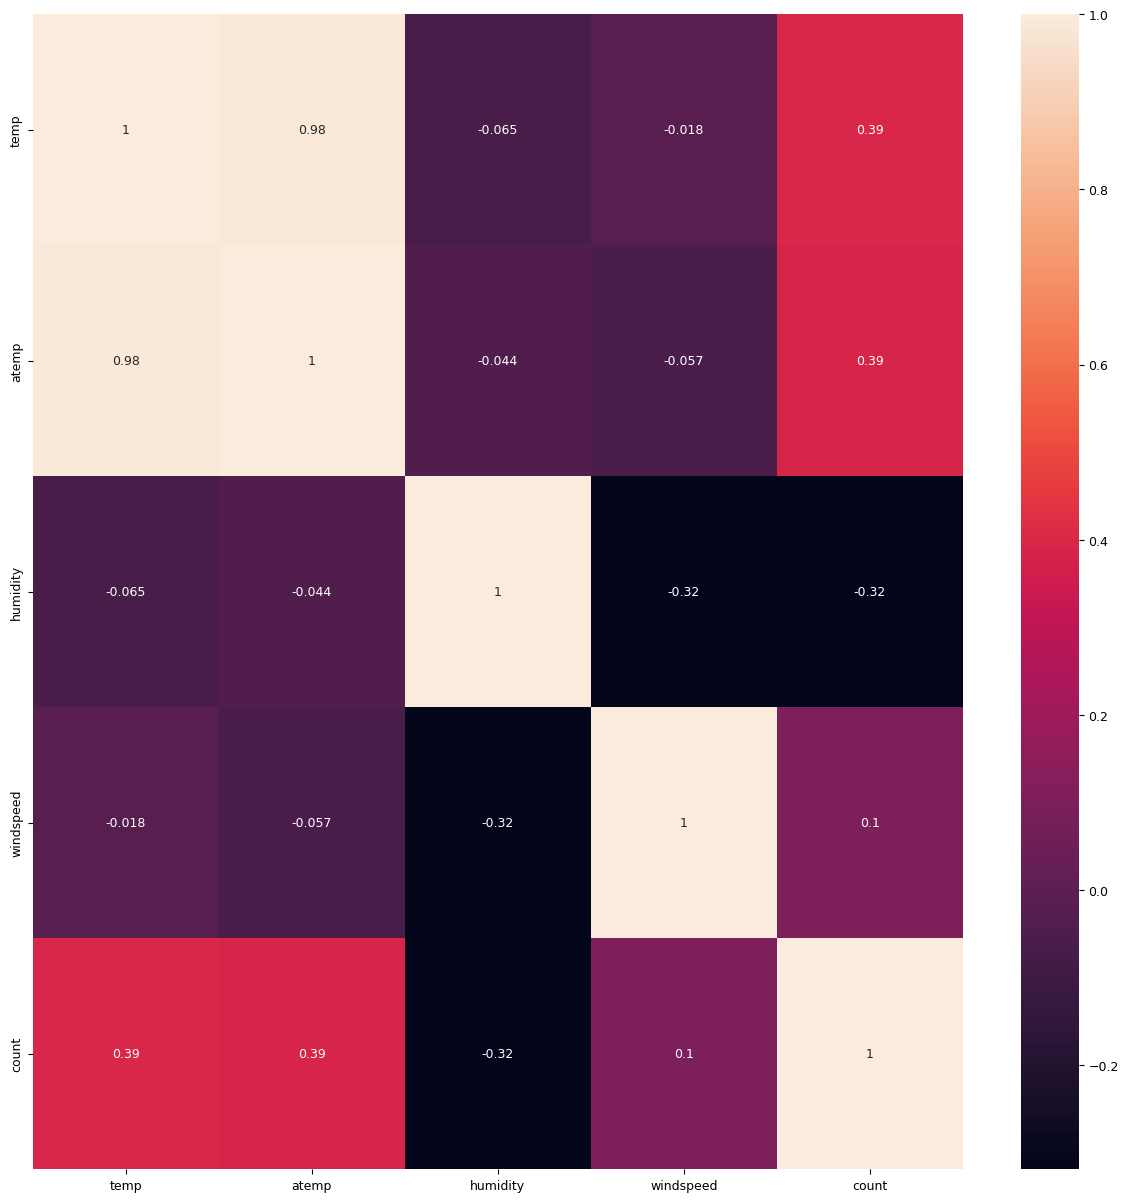

In [44]:
plt.figure(figsize=(15,15))

corr = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr, annot=True)

In [46]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64

In [49]:
train.eq(0).sum(axis=0)

datetime          0
season            0
holiday       10575
workingday     3474
weather           0
temp              0
atemp             0
humidity         22
windspeed      1313
casual          986
registered       15
count             0
year              0
month             0
day               0
hour            455
weekday           0
dtype: int64